# Lab 14 Template              

Proving that the SNe data is consistent with the BenchMark Cosmology.


Before we get started, let's execute the following cell which is almost always needed for our notebooks:

In [56]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.constants import c
from scipy.integrate import simps

# Importing the solutions from Lab 13
#from Lab13_Template import CosmologicalTools

In [57]:
#I was having import issues so i had to import the entire cell
#sorry that it makes it so long

class CosmologicalTools:
    # Define a class that provides functions to compute 
    # various cosmological quantities
    # for a given cosmology  
        
    def __init__(self, OmegaM0, OmegaR0, OmegaL0, h):
        """ initialize the instance of the class 
        - for any given Cosmology
        
        PARAMETERS
        ----------
        OmegaM0: `float`
            the Matter density parameter at z=0
        
        OmegaR0: `float` 
            the radiation density parameter at z=0
        
        OmegaL0: `float`
            The dark energy density parameter at z=0
            
        h: `float` 
            the Normalization for the hubble parameter at z=0
        """
        
        # initialize the cosmology at z=0
        self.OmegaM0 = OmegaM0    ### Matter Density Parameter
        self.OmegaR0 = OmegaR0    ### Radiation Density Parameter
        self.OmegaL0 = OmegaL0    ### Dark Energy Density Parameter
        #### Curvature Density Parameter
        self.OmegaK0 = 1 - (OmegaM0 + OmegaR0 + OmegaL0)    
    
        self.h = h   # Normalization of Hubble Parameter   
        self.Ho = self.h*100*u.km/u.s/u.Mpc 
        #  Hubble Constant at z=0  100 h km/s/Mpc
    
    
    def HubbleParameter(self, z):
        """  Method that defines the Hubble Parameter as a function of redshift
            H(z)^2 = H_o^2 [ OmegaM0(1+z)^3 + OmegaR0(1+z)^4 
            + OmegaLambda0 + OmegaK0(1+z)^2] 
        
        PARAMETERS
        ----------
            z: `float`
                redshift 
            
        RETURNS
        -------
            Hz: `float`
                Hubble Parameter as a function of z, in units of km/s/Mpc
        """
        
        # FILL THIS IN 
        OmegaM = self.OmegaM0*(1+z)**3 # OmegaM 
        OmegaR = self.OmegaR0*(1+z)**4
        OmegaL = self.OmegaL0
        OmegaK = self.OmegaK0*(1+z)**2
        
        Hz = self.Ho*np.sqrt(OmegaM+OmegaR+OmegaL+OmegaK)
        
        return  Hz
    
    
    
    def OmegaM_Z(self,z):
        """ Method that defines the matter density
        parameter as a function of redshift
        OmegaM0*(1+z)**3*(Ho/Hz)^2
        
        PARAMETERS
        ----------
        z  `float or np.ndarray`
            Redshift
        
        RETURNS
        -------
        OmegaM: `float or np.ndarray`
            Matter Density Parameter at the given redshift.
        """
        
        OmegaM = self.OmegaM0*(1+z)**3*self.Ho**2/self.HubbleParameter(z)**2
        
        return OmegaM
    
    def OmegaR_Z(self,z):
        """ Method that defines the radiation density parameter 
        as a function of redshift
         OmegaR0*(1+z)**4*(Ho/Hz)^2
         
        PARAMETERS
        ----------
        z  `float or np.ndarray`
            Redshift
        
        RETURNS
        -------
        OmegaR: `float or np.ndarray`
            Radiation Density Parameter at the given redshift.
        """
        
        OmegaR =   self.OmegaR0*(1+z)**4*self.Ho**2/self.HubbleParameter(z)**2
        
        return OmegaR
    
    
    def OmegaL_Z(self,z):
        """ Method that defines the dark energy density parameter 
        as a function of redshift
        OmegaL0*(Ho/Hz)^2
        
        PARAMETERS
        ----------
        z  `float or np.ndarray`
            Redshift
        
        RETURNS
        -------
        OmegaL: `float or np.ndarray`
            Dark Energy Density Parameter at the given redshift.
        """
            
        OmegaL = self.OmegaL0*self.Ho**2/self.HubbleParameter(z)**2
        
        return OmegaL
    
    
       
    
    
    def LookBackTime(self, ze):
        """ Method that computes the Look Back Time at a given redshift
         i.e. the difference in time from when a photon was 
         emitted to when it is observed at present day.
         
         Integrand: 1/H(z)/(1+z)
         
        PARAMETERS
        ----------
        ze : `float`
            Redshift emitted (ze). This cannot be an array
            
        RETURNS
        -------
        time: `float`
            Time in units of Gyr ago (relative to present day)
        """
        
        # Observed redshift - today
        zo = 0
    
        # define an array with redshifts, spaced in 
        #intervals of 0.001 from zo to ze
        zrange = np.arange(zo, ze, 1e-3)
        
        
        # Integrand
        # y = (1/H(zrange)).to(GYR)  /  (1+zrange) 
        # --> this conversion also takes care of the km/Mpc issue
        # But need to correct units of 1/H to be Gyr rather than seconds  
        # use the astropy.units functionality .to(units)
        y = (1.0/self.HubbleParameter(zrange)).to(u.Gyr)/(1+zrange)  
        
       
        # Integrate y numerically over zrange and return in units of Gyr
        # for whatever reason simps gets rid of the units so
        # you have to add them back. 
        time = simps(y,zrange)*u.Gyr

        return time
    
    
    
    def ComovingDistance(self, zo, ze):
        """ Method that computes the Comoving Radial Distance to 
         an object at a given redshift.
        i.e, Distance to a galaxy that is moving with the Hubble Flow
        (expanding universe) at a given redshift
            Dc = c*Int_z0^ze 1/H(z)

        PARAMETERS
        ----------
        zo: `float`
            Redshift of the observer
            
        ze: `float`
            Redshift of the object emitting the photon
            
        RETURNS
        -------
        DC: `float`
            Comoving Radial Distance (Mpc)
        """
        
        # define an array with redshifts, spaced  in intervals of 0.001
        # Note that if you want redshifts smaller than 
        # 0.001 you'll need to refine this
        zrange = np.arange(zo, ze, 1e-3)
    
        
        # Integrand
        # 1/H(zrange)*speed of light
        # Speed of light is loaded in modules from astropy, 
        # but in units of m/s --> need in km/s
        y = c.to(u.km/u.s)*(1.0/self.HubbleParameter(zrange))
    
        
        # Integrate y numerically over zrange and return in units of Mpc
        DC = simps(y,zrange)*u.Mpc
        
        return DC
    
        
    def ProperDistance(self, zo, ze):
        """ Method that returns the Proper Distance 
            to an object at some redshift (ze)
            to an observer a given redshift (the distance 
            measured by a ruler).
            This is the Horizon Distance.
             R(tobs)*DC = DC/(1+zobs)
            
        PARAMETERS
        ---------
             
        zo: `float`
            Redshift of the observer
            
        ze: `float`
            Redshift of the object emitting the photon
            
        RETURNS
        -------
        DH: `float`
            Proper Distance (Mpc)
        """
    
        # Comoving Distance[ independent of time] x the scale factor at 
        # the time of observation.
        DH = self.ComovingDistance(zo,ze)/(1+zo) 
        # if zo=0 then this is just the comoving distance
        
        return DH

     
    def LuminosityDistance(self, ze): 
        """ Method that computes the Luminosity Distance to an object 
        at some redshift (ze)
               DL = DC*(1+z_emitted)
            
        PARAMETERS
        --------- 
        ze: `float`
            Redshift of the object emitting the photons
            
        RETURNS
        -------
        DL: `float`
            Luminosity Distance (Mpc)
        """
    
        zo = 0 # This is a quantity computed by an observer at z=0
        
        DL = self.ComovingDistance(zo,ze)*(1+ze)
        
        return DL
    
    
    def AngularDiameterDistance(self, ze): 
        """ Method that computes the Angular Diameter Distance to 
            an object at some redshift (ze)
               DA = DC/(1+z_emitted)
            DA is the distance to the source,  
            such that it subtends the same angle 
            it would have in Euclidean Space

            
        PARAMETERS
        --------- 
        ze: `float`
            Redshift of the object emitting the photons
            
        RETURNS
        -------
        DA: `float`
            Angular Diameter Distance (Mpc)
        """
    
        # this is an observable so
        zo = 0
        
        # # FILL THIS IN
        DA = self.ComovingDistance(zo,ze)/(1+ze)  
    
        return DA   
    
        
    def Size(self, ze, angle):
        """ Method to compute the physical distance corresponding to a given 
            angular separation at a given redshift
            S = DA*angle
        
        PARAMETERS
        --------- 
        ze: `float`
            Redshift of the object emitting the photons
            
        angle: `float`
            Angular separation or size (arcsec)
            
        RETURNS
        -------
        size: `float`
            Physical Size of the Object or the 
            Separation between objects (kpc)
        """
        
        # convert angle from arcsec to radians
        angleRad = (angle*u.arcsec).to(u.rad)
    
        #   DA*angleRad
        size = self.AngularDiameterDistance(ze).to(u.kpc)*angleRad.value
        # recall angular diameter distance is in Mpc
        
        return size
    
    
    #######################
    ## Lab 13  Starts here
    ######################
    
    #  Part 1: Question 1 
    def Temperature(self, z):
        """ Method that computes the temperature of the universe as
            a function of redshift
            T = To(1+z)
        
        PARAMETERS
        ----------
        z: `float`
            Redshift of interest
            
        RETURNS
        -------
        T: `float`
            Temperature at that redshift in K
        
        """
  
        # Temperature of the universe today 
        To = 2.73*u.K
        
        # Fill this in 
        T = To*(1+z)
        
        return T

    
    # Part 3: Question 1
    ## Fill this in 
    def SoundHorizon(self, ze, zlarge):
        """ Method that computes the maximal distance that sound 
            can travel since the beginning of the universe
        until the given epoch. 
            ProperDistance/sqrt(3)    (cs = c/sqrt(3))
        
        
        PARAMETERS
        ----------
        ze:  `float`
            Redshift of interest (usually redshift of recombination = 1100)
        
        zlarge: `float`
            A large redshift to denote early age of the universe
        
        RETURNS
        ------- 
        SH: `float`
            Sound Horizon in Mpc
        
        """
      
        # Fill this in
        SH = self.ProperDistance(ze, zlarge)/np.sqrt(3)
        
        return SH


In [60]:

# Define the benchmark cosmology at z =0
# Planck 2016 results. XIII. Cosmological parameters   
# Planck Collaboration+2016 A&A 594 13  Table 4, column 2 

OmegaM0_planck = 0.308   # Matter Density Parameter
OmegaR0_planck = 8.24e-5  # Radiation Density Parameter
OmegaL0_planck = 0.692  # Dark Energy Density Parameter
h_planck = 0.6781   # Hubble Constant  100 h km/s/Mpc


In [62]:
# Define the Einstein-DeSitter cosmology (Matter Dominated)
OmegaMD = 1
OmegaRD = 0
OmegaLD = 0
# h is the same = h_planck

In [64]:
# Initialize Instances of the Cosmological Tools Class. 
BenchMark = CosmologicalTools(OmegaM0_planck,OmegaR0_planck,OmegaL0_planck,h_planck)
EinsteinDeSitter = CosmologicalTools(OmegaMD,OmegaRD,OmegaLD,h_planck)



In this exercise we will use data from the Supernova Cosmology project, one of the two teams which first found that the expansion rate of the Universe is accelerating in 1999. A simple introduction to the methods and findings of the SCP group can be found at https://newscenter.lbl.gov/2009/10/27/evolving-dark-energy/. The original paper is Perlmutter *et al.* 1999, "Measurement of $\Omega$ and $\Lambda$ from 42 High Redshift Supernovae", The Astrophysical Journal, Vol. 517, page 565.

The data set we will be using is a more recent sample, containing observations of 580 supernovae, known as the Union 2.1 sample from the paper Suzuki *et al*. 2012, "THE *HUBBLE SPACE TELESCOPE* CLUSTER SUPERNOVA SURVEY. V. IMPROVING THE DARK-ENERGY CONSTRAINTS ABOVE $z>1$ AND BUILDING AN EARLY-TYPE-HOSTED SUPERNOVA SAMPLE", The Astrophysical Journal, vol. 746, page 85.

The data are in the file SNeData.txt.

Take a look at the file using the `with` statement. 

One should always close files when finished using them.
The `with` statement makes this automatic.

Lets simply open the file and print out the first 10 lines to see how the file is formatted:

In [68]:
with open('SNeData.txt', 'r') as infile:
    for i in range(10):
        line = infile.readline()
        line = line.rstrip("\n")
        print(line)

# Supernova Cosmology Project Union2.1 Data
#  Suzuki et al. 
#Name z DistMod DistModErr ProbLowMassHost
1993ah 0.028488        35.3465833928 0.223905932998  0.128418942246
1993ag 0.050043        36.6823679154 0.166828851413  0.128418942246
1993o  0.052926        36.8176912545 0.1557559148    0.128418942246
1993b  0.070086        37.4467365424 0.158466934433  0.128418942246
1992bs 0.062668        37.4834093505 0.156099434739  0.128418942246
1992br 0.087589        38.2290570494 0.187745679272  0.128418942246
1992bp 0.078577        37.4881622607 0.155635656185  0.128418942246


The top of any good data file intended for sharing with others contains a "header" -- some lines at the top which describe the contents of the file.

Here we see that the file contains the SCP Union2.1 data, and that the columns are:

 * the name of the supernova
 * the redshift measured from its spectrum
 * its distance modulus
 * an estimate of the measurement error in the distance modulus
 * the probability the supernova occurred in a low-mass host galaxy
 


# Part A

The difference between the absolute magnitude $M$ and the apparent magnitude $m$, a number called the *distance modulus* which depends only upon the distance to the source

$$
\begin{split}
m-M &= - 2.5 \log_{10} \left(\frac{1}{F_0}\frac{L}{4\pi d^2}\right) + 2.5 \log_{10}\left(\frac{1}{F_0}\frac{L}{4\pi(10\ \textrm{pc})^2}\right)  \\
&= 5 \log_{10}\left(\frac{d}{10\ \textrm{pc}}\right)
\end{split}
$$
Because $M$ and $m$ are logarithmic functions, their difference is proportional to the *ratio* of the distance $d$ to 10 pc.

This is the distance measurement given in the data file for the distance to the supernovae. The measured LUMINOSITY distance is then

$$ d_L = 10^{(m-M)/5 +1} \textrm{pc} $$

In [73]:
def Distance_fromMod(mod):

    """ Function to compute the distance using the distance modulus
    PARAMETERS
    ----------
    mod: `float`
        distance modulus (apparent magnitude - absolute magnitude)

    OUTPUTS
    -------
    DL: `float`
        luminiosity distance in Mpc
    """
    
    # Fill this in 
    a = (mod)/5 + 1
    DL = (10**a*u.pc).to(u.Mpc)
    
    return DL

In [75]:
# Read the file in and store the values using `npgenfromtxt`
data = np.genfromtxt('SNeData.txt', names = True, skip_header = 2)

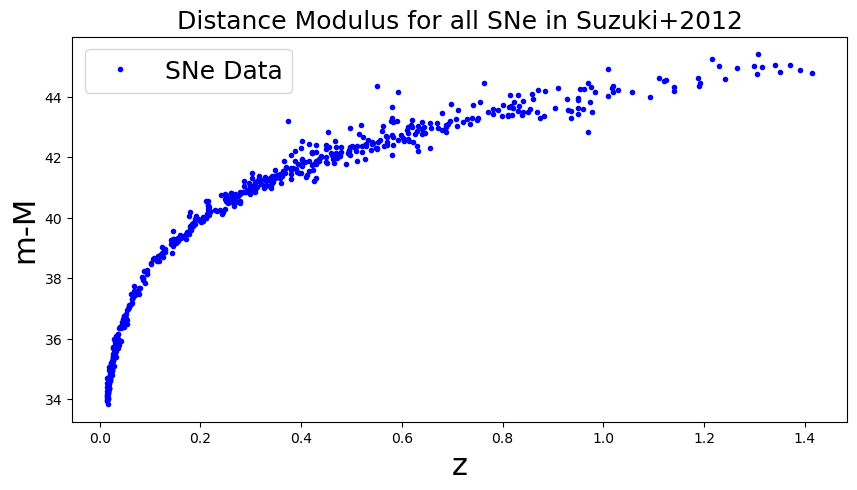

In [77]:
# Create a plot of Distance Modulus Vs. Redshift
# This is Figure 4 of Suzuki et al. 

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

# plot here
ax.plot(data['z'], data['DistMod'], 'b.', label = 'SNe Data')

ax.set_xlabel('z', fontsize=22)
ax.set_ylabel('m-M', fontsize=22)
ax.set_title('Distance Modulus for all SNe in Suzuki+2012', fontsize=18)

legend = ax.legend(loc='upper left',fontsize=18)


# Part B

For each SNe in the data file compute: 

1) the luminosity distance, using from the distance modulus;

and

2) the recessional velocity in km/second, computed from the redshift using the relativistic doppler shift at low speeds, where v << c. 

$1+z = \frac{\lambda_{\rm obs}}{\lambda_{\rm e}}$

$z = \frac{\Delta \lambda}{\lambda_{\rm e}} = \frac{v}{c}$

In [80]:
#1) Distance
# Use Distance Modulus to determine the luminosity distance to each supernova

LD = Distance_fromMod(data['DistMod'])
print(LD[0])

117.30504178865594 Mpc


In [82]:
#2) Velocity
# Determine the recessional speed based on the redshift
#v = c*z
VR = data['z']*c.to(u.km/u.s)

print(VR[0])

8540.487543504 km / s


# Part C

Plot distance versus velocity just for the "nearby" supernovae, those within 200 Mpc of Earth. We can select the set of indices of the nearby supernovae using the `numpy.where` function

In [85]:
# Create an index for the nearby supernovae
near = np.where(LD.value < 200)

In [87]:
# store the number of nearby supernovae
nNear = len(near[0])
print(nNear)

135


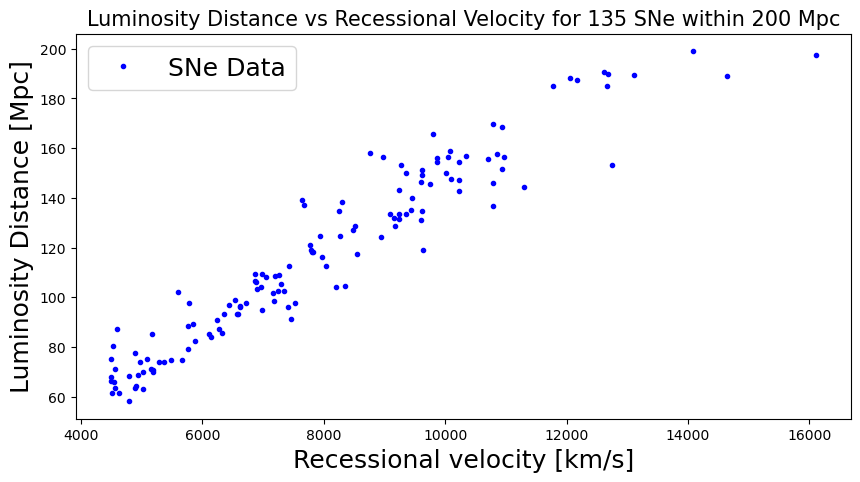

In [89]:
# Plot the Luminosity Distance vs. Recessional Speed for all nearby Supernovae

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

# plot nearby SNe
ax.plot(VR[near], LD[near], 'b.', label = 'SNe Data')

ax.set_xlabel('Recessional velocity [km/s]', fontsize=18)
ax.set_ylabel('Luminosity Distance [Mpc]', fontsize=18)
ax.set_title(f"Luminosity Distance vs Recessional Velocity for {nNear} SNe within 200 Mpc",
             fontsize=15)

legend = ax.legend(loc='upper left',fontsize=18)


# Part D

Add a linear model atop the data, using Hubble's Law

 V = Hubble Parameter today * Comoving Radial Distance = H$_o$ D$_c$

In [92]:
# Create a linear model
#VR = h0 * D
modelLD = VR/BenchMark.Ho



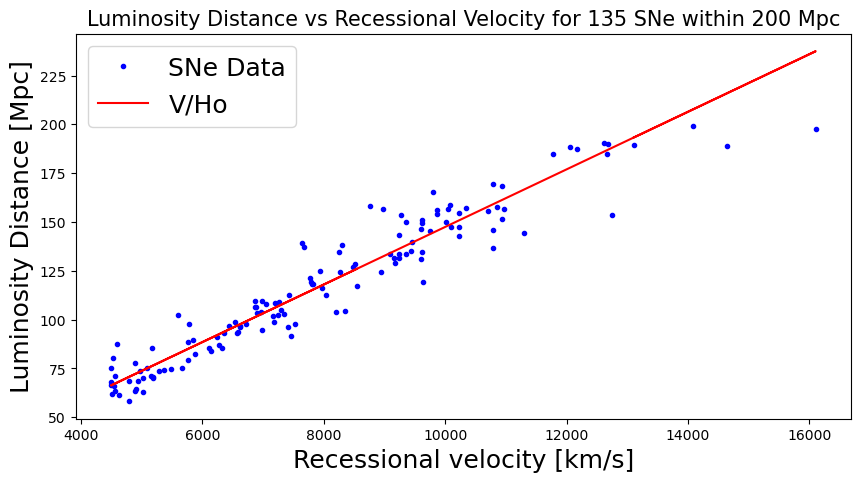

In [94]:
# Add the linear model to the figure of the nearest SNe
# Plot the Luminosity Distance vs. Recessional Speed for all nearby Supernovae

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

# plot nearby SNe
ax.plot(VR[near], LD[near], 'b.', label = 'SNe Data')

#add the model
ax.plot(VR[near], modelLD[near], 'r', label = 'V/Ho')

ax.set_xlabel('Recessional velocity [km/s]', fontsize=18)
ax.set_ylabel('Luminosity Distance [Mpc]', fontsize=18)
ax.set_title(f"Luminosity Distance vs Recessional Velocity for {nNear} SNe within 200 Mpc",
             fontsize=15)

legend = ax.legend(loc='upper left',fontsize=18)

# Part E
Let's now try plotting the whole dataset, which extends to distances far beyond what Hubble could have measured in his day

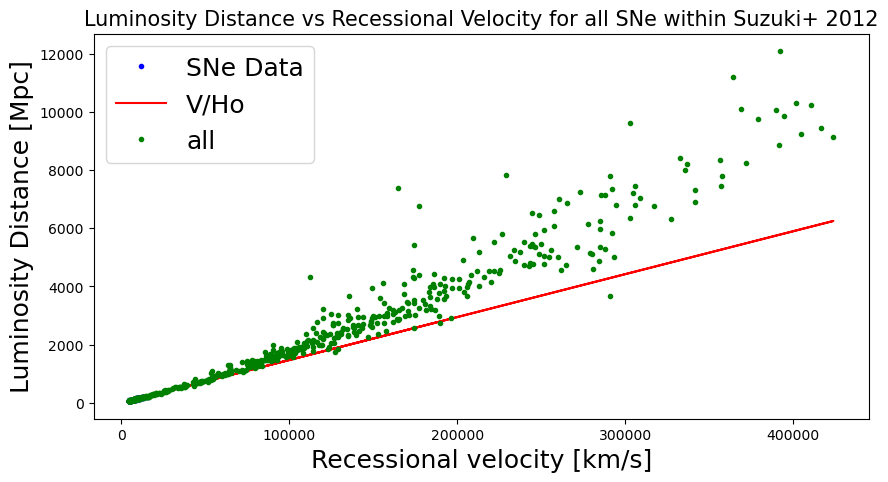

In [97]:
# Plot the whole dataset, not just the nearby SNe
# Plot the Luminosity Distance vs. Recessional Speed for all nearby Supernovae

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

# plot nearby SNe
ax.plot(VR[near], LD[near], 'b.', label = 'SNe Data')

#add the model
ax.plot(VR, modelLD, 'r', label = 'V/Ho')

#all of em 
ax.plot(VR, LD, 'g.', label = 'all')

ax.set_xlabel('Recessional velocity [km/s]', fontsize=18)
ax.set_ylabel('Luminosity Distance [Mpc]', fontsize=18)
ax.set_title(f"Luminosity Distance vs Recessional Velocity for all SNe within Suzuki+ 2012",
             fontsize=15)

legend = ax.legend(loc='upper left',fontsize=18)


The distant supernovae are moving more slowly than a constant Ho would predict...

 note that you could import `LambdaCDM` object from `astropy.cosmology` (CDM is "cold dark matter")

`from astropy.cosmology import LambdaCDM`

But instead we're going to use our own code ! 

# Part F

Instead of assuming a linear model, let's use our code to compute a model for the luminosity distance to objects moving with the Hubble flow. 

In [101]:
# define an array of redshifts to compute the luminosity distance
zarray = np.linspace(0.01, 1.1*max(data['z']), 100)

In [103]:
# Compute the corresponding recessional velocities using the doppler shift
# z = v/c
vrec = zarray*c.to(u.km/u.s)

In [107]:
# Generate models for the luminosity distance as a function of z 
# for Benchmark and Einstein De Sitter Cosmologies. 
# Use a list comprehension
modelLD_Benchmark = [ BenchMark.LuminosityDistance(i).value for i in zarray ]
modelLD_EinsteinDeSitter = [ EinsteinDeSitter.LuminosityDistance(i).value for i in zarray ]

In [ ]:
# Plot the new models on top of the data


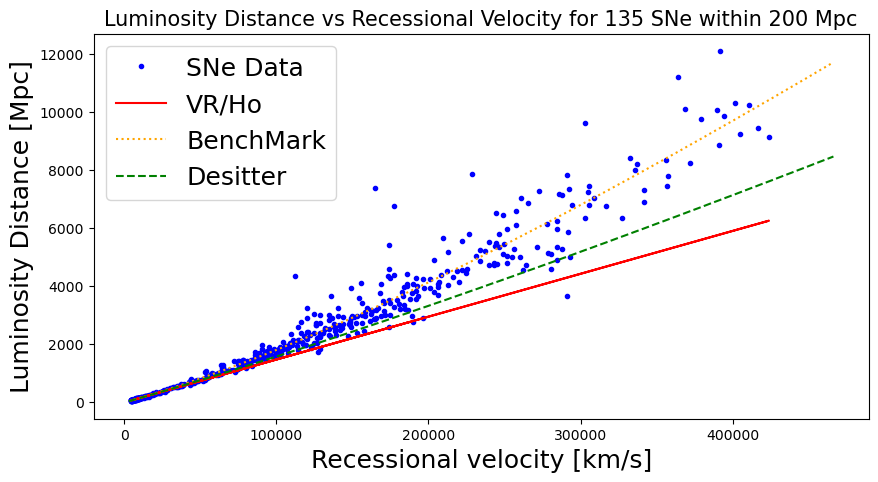

In [109]:
# Plot the Luminosity Distance vs. Recessional Speed for all nearby Supernovae

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

# plot all SNe
ax.plot(VR, LD, 'b.', label = 'SNe Data')

ax.plot(VR, modelLD, 'r', label = 'VR/Ho')

ax.plot(vrec, modelLD_Benchmark, 'orange', label = 'BenchMark', linestyle = ':')

ax.plot(vrec, modelLD_EinsteinDeSitter, 'green', label = 'Desitter', linestyle = '--')

ax.set_xlabel('Recessional velocity [km/s]', fontsize=18)
ax.set_ylabel('Luminosity Distance [Mpc]', fontsize=18)
ax.set_title(f"Luminosity Distance vs Recessional Velocity for {nNear} SNe within 200 Mpc",
             fontsize=15)

legend = ax.legend(loc='upper left',fontsize=18)


To determine the best fit, you would test different values of Omega_M and Omega_L and generate probability contours

![title](scp2.1.png)

